In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,paciente_id
0,44,1977-04-18,M,1,BRANCA,ARAPIRACA,57510,PATOS,912,Médico,9,Trabalhadores de Saúde,2021-11-11,Reforço,87,COVID-19 PFIZER - COMIRNATY,f9495cb04daf5adb495d22c9c88b31883f191fb762ab27...
1,5,2016-11-18,M,1,BRANCA,PARELHAS,None,CAMPINA GRANDE,207,Pessoas de 5 a 11 anos,0,NaN,2022-02-07,1ª Dose,99,COVID-19 PEDIÁTRICA - PFIZER COMIRNATY,52288faace8c986872faca7101868ae8a23fefd435cd51...
2,39,1982-01-23,F,99,SEM INFORMACAO,CAMPINA GRANDE,58410,CAMPINA GRANDE,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-16,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,0ffaed327aac7fe8abf0b35471b0b1fa60f9fc48ff7d9c...
3,33,1988-07-20,M,2,PRETA,BAYEUX,58110,BAYEUX,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-07-23,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,fe78cee14dce3436024728b1d760439861021207a32712...
4,27,1994-03-22,M,3,PARDA,JOAO PESSOA,58058,JOAO PESSOA,201,Pessoas de 18 a 64 anos,2,Faixa Etária,2021-12-07,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,470944c18359d6a1fea2a53194d29bfdb7ce1d21b47979...


In [45]:
casos_df = pd.read_csv('datasets/dados_casos.csv')
casos_df

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095
2,2021-08-22,PB,Alagoa Grande,city,4117,72,True,28439,2500304,14476.59904,0.0175
3,2021-08-22,PB,Alagoa Nova,city,1511,25,True,20921,2500403,7222.40811,0.0165
4,2021-08-22,PB,Alagoinha,city,2072,25,True,14560,2500502,14230.76923,0.0121
...,...,...,...,...,...,...,...,...,...,...,...
218,2021-08-22,PB,Umbuzeiro,city,545,14,True,9911,2517001,5498.94057,0.0257
219,2021-08-22,PB,Várzea,city,132,1,True,2841,2517100,4646.25132,0.0076
220,2021-08-22,PB,Vieirópolis,city,288,5,True,5372,2517209,5361.13179,0.0174
221,2021-08-22,PB,Vista Serrana,city,190,6,True,3824,2505501,4968.61925,0.0316


In [35]:
vax_df.value_counts('vacina_codigo')

vacina_codigo
87    1121621
85     783300
86     679322
88     113683
99      64465
89      42221
98       2180
dtype: int64

como tem dois códigos diferentes para catalogar astrazenica (85 e 89), iremos eliminar um do dicionario e adicionar as ocorrencias do outro ao primeiro

In [36]:
vax_codigos_dict = {85: 'Astrazenica',
                    86: 'Coronavac',
                    87: 'Pfizer',
                    88: 'Jansen',
                    99: 'Pfizer pediátrica'}

codigos = pd.Series(vax_codigos_dict)

In [37]:
vax_aplicacoes_dict = {87: 421567,
                       85: 308547,
                       86: 254651,
                       88: 41159,
                       99: 21899}

aplicacoes = pd.Series(vax_aplicacoes_dict)

In [38]:
vax_aplicadas = pd.DataFrame({"vacina":codigos, "quantidade de doses aplicadas": aplicacoes})
vax_aplicadas

,vacina,quantidade de doses aplicadas
85,Astrazenica,308547
86,Coronavac,254651
87,Pfizer,421567
88,Jansen,41159
99,Pfizer pediátrica,21899


Vemos pelo gráfico que a vacina mais aplicada na paraíba foi a Pfizer, sgeuida pela

<AxesSubplot:xlabel='vacina', ylabel='quantidade de doses aplicadas'>

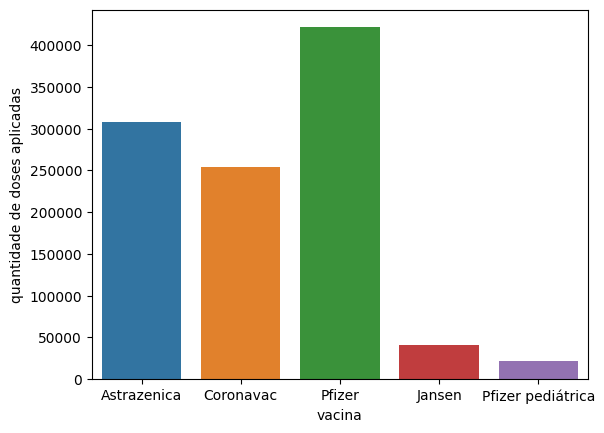

In [39]:
sns.barplot(data=vax_aplicadas, x='vacina', y='quantidade de doses aplicadas')

In [40]:
vax_df.value_counts('paciente_enumSexoBiologico')

paciente_enumSexoBiologico
F    1506616
M    1300158
I         16
dtype: int64

In [41]:
et_count = vax_df.value_counts('paciente_racaCor_valor')
et_count

paciente_racaCor_valor
PARDA             1040425
BRANCA             664898
AMARELA            593652
SEM INFORMACAO     391266
PRETA              105218
INDIGENA            11331
dtype: int64

Text(0, 0.5, 'Etnia')

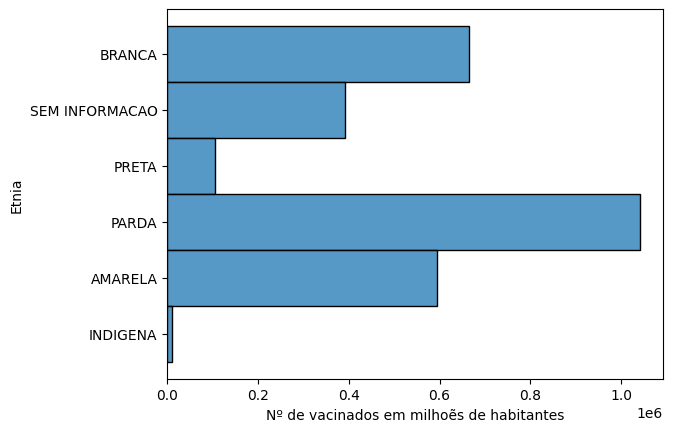

In [42]:
fig = sns.histplot(data= vax_df, y= 'paciente_racaCor_valor')
fig.set_xlabel('Nº de vacinados em milhoẽs de habitantes')
fig.set_ylabel('Etnia')

A partir da leitura do gráfico, percebemos que os municípios com a menor quantidade de casos confirmados a cada 100 mil habitantes possuem a maior mortalidade. Tendo em mente que o cálculo da mortaliadade é feito dividindo o número de mortos pelo número de casos confirmados, os municípios que testaram menos possuirão uma mortalidade acentuada em consequência de uma provável subnotificação de casos. Aumentando a mortalidade, que é inversamente proporcional ao número de casos confirmados.

Text(0, 0.5, 'Mortalidade por quantidade de casos')

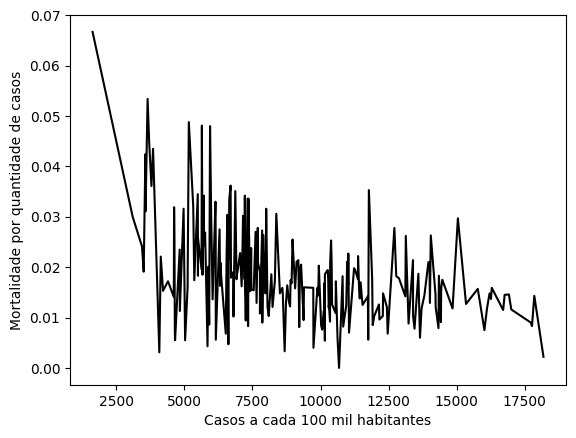

In [56]:
lin_drt = sns.lineplot(data = casos_df, x = 'confirmed_per_100k_inhabitants', y = 'death_rate', color= 'black')
lin_drt.set_xlabel('Casos a cada 100 mil habitantes')
lin_drt.set_ylabel('Mortalidade por quantidade de casos')